Train
=====

In [1]:
from IPython.display import display, HTML

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Make sure plots are shown inside the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
raw_train_data = pd.read_csv('../training_ultrasound.csv')

In [4]:
# only consider pre-birth entries
raw_train_data = raw_train_data.query('AGEDAYS < 0')

In [5]:
raw_train_data.head()

,STUDYID,SUBJID,SEXN,SEX,GAGEBRTH,BIRTHWT,BIRTHLEN,BIRTHHC,DELIVERY,PARITY,...,FEMURCM,ACAZ,BPDAZ,FLAZ,BHC_Z,BLEN_Z,BWT_Z,BWT_40,BLEN_40,BHC_40
0,1,1002,2,Female,276,3540,50.3,NaN,Category 2.0,1.0,...,7.3,0.463035,-0.237645,2.142646,NaN,0.891600,0.860470,3.614882,50.610029,NaN
3,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,6.3,-1.223773,-0.453516,1.616571,NaN,0.235298,-0.725564,3.100000,50.300000,NaN
4,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,6.3,-1.319698,-0.553987,1.495569,NaN,0.235298,-0.725564,3.100000,50.300000,NaN
5,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,7.2,-1.357285,-0.607140,1.106900,NaN,0.235298,-0.725564,3.100000,50.300000,NaN
6,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,7.2,-1.522721,-0.715238,0.876728,NaN,0.235298,-0.725564,3.100000,50.300000,NaN


In [6]:
def feature_selection1(raw_train_data):
  clean_data = raw_train_data[["SEXN", "GAGEDAYS", "HCIRCM", "ABCIRCM", "FEMURCM", "BPDCM", "ABCIRCM", "GAGEBRTH", "BWT_40"]]
  clean_data = clean_data.dropna()
  clean_labels = clean_data["BWT_40"]
  clean_data = clean_data.drop("BWT_40", 1)
  return clean_data, clean_labels

temp_data, temp_labels = feature_selection1(raw_train_data)
temp_data.join(temp_labels).describe()

,SEXN,GAGEDAYS,HCIRCM,ABCIRCM,FEMURCM,BPDCM,ABCIRCM,GAGEBRTH,BWT_40
count,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000
mean,1.476917,211.135595,26.197389,24.439871,5.445194,7.303052,24.439871,274.476287,3.261737
std,0.499498,50.270776,6.604140,7.451865,1.638649,1.887381,7.451865,7.913334,0.361696
min,1.000000,31.000000,1.100000,0.400000,0.200000,1.300000,0.400000,231.000000,2.206470
25%,1.000000,172.000000,22.200000,19.100000,4.400000,6.000000,19.100000,270.000000,3.011377
50%,1.000000,224.000000,28.700000,26.500000,6.000000,8.000000,26.500000,274.000000,3.240601
75%,2.000000,256.000000,31.100000,30.425000,6.700000,8.700000,30.425000,280.000000,3.487228
max,2.000000,290.000000,36.300000,38.200000,7.900000,10.300000,38.200000,294.000000,5.713087


In [7]:
def normalized_column(col):
  return (col - col.min()) / (col.max() - col.min())

def feature_selection2(raw_train_data):
  clean_data = raw_train_data[["SEXN", "GAGEDAYS", "HCIRCM", "ABCIRCM", "FEMURCM", "BPDCM", "ABCIRCM", "BWT_40", "GAGEBRTH"]]
  clean_data = clean_data.dropna()
  clean_data["SEXN"] = normalized_column(clean_data["SEXN"])
  clean_data["GAGEDAYS"] = normalized_column(clean_data["GAGEDAYS"])
  clean_data["HCIRCM"] = normalized_column(clean_data["HCIRCM"])
  clean_data["ABCIRCM"] = normalized_column(clean_data["ABCIRCM"])
  clean_data["FEMURCM"] = normalized_column(clean_data["FEMURCM"])
  clean_data["BPDCM"] = normalized_column(clean_data["BPDCM"])
  clean_labels = clean_data["BWT_40"]
  clean_data = clean_data.drop("BWT_40", 1)
  return clean_data, clean_labels

temp_data, temp_labels = feature_selection2(raw_train_data)
temp_data.join(temp_labels).describe()

,SEXN,GAGEDAYS,HCIRCM,ABCIRCM,FEMURCM,BPDCM,ABCIRCM,GAGEBRTH,BWT_40
count,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000
mean,0.476917,0.695504,0.712994,0.635975,0.681194,0.667006,0.635975,274.476287,3.261737
std,0.499498,0.194096,0.187618,0.197139,0.212812,0.209709,0.197139,7.913334,0.361696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,231.000000,2.206470
25%,0.000000,0.544402,0.599432,0.494709,0.545455,0.522222,0.494709,270.000000,3.011377
50%,0.000000,0.745174,0.784091,0.690476,0.753247,0.744444,0.690476,274.000000,3.240601
75%,1.000000,0.868726,0.852273,0.794312,0.844156,0.822222,0.794312,280.000000,3.487228
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,294.000000,5.713087


In [8]:
def feature_selection3(raw_train_data):
  clean_data = raw_train_data[["SEXN", "GAGEDAYS", "HCIRCM", "ABCIRCM", "FEMURCM", "BPDCM", "BWT_40", "HCAZ", "ACAZ", "BPDAZ", "FLAZ"]]
  clean_data = clean_data.dropna()
  clean_data["SEXN"] = normalized_column(clean_data["SEXN"])
  clean_data["GAGEDAYS"] = normalized_column(clean_data["GAGEDAYS"])
  clean_data["HCIRCM"] = normalized_column(clean_data["HCIRCM"])
  clean_data["ABCIRCM"] = normalized_column(clean_data["ABCIRCM"])
  clean_data["FEMURCM"] = normalized_column(clean_data["FEMURCM"])
  clean_data["BPDCM"] = normalized_column(clean_data["BPDCM"])
  clean_labels = clean_data["BWT_40"]
  clean_data = clean_data.drop("BWT_40", 1)
  return clean_data, clean_labels

temp_data, temp_labels = feature_selection3(raw_train_data)
temp_data.join(temp_labels).describe()

,SEXN,GAGEDAYS,HCIRCM,ABCIRCM,FEMURCM,BPDCM,HCAZ,ACAZ,BPDAZ,FLAZ,BWT_40
count,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000,7817.000000
mean,0.476014,0.626793,0.682074,0.613808,0.685882,0.671934,-0.688641,-0.789044,-1.109042,0.190649,3.262316
std,0.499456,0.231782,0.201220,0.203863,0.203694,0.200545,1.009758,1.188134,1.089193,1.032031,0.361548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.702422,-9.089636,-6.474786,-5.466641,2.206470
25%,0.000000,0.441748,0.553398,0.461318,0.552632,0.539326,-1.348210,-1.348693,-1.767107,-0.504378,3.011993
50%,0.000000,0.679612,0.757282,0.667622,0.750000,0.741573,-0.711708,-0.709055,-1.084623,0.190443,3.241126
75%,1.000000,0.834951,0.831715,0.779370,0.842105,0.820225,-0.037122,-0.066534,-0.377814,0.863643,3.487228
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.626893,4.576060,2.918980,5.984496,5.713087


In [21]:
def feature_selection4(raw_train_data):
  # input colums
  measurement_columns = ["HCIRCM", "ABCIRCM", "FEMURCM", "BPDCM"]
  other_columns = ["SEXN", "PARITY", "GRAVIDA"]
  time_column = "GAGEDAYS"
  identifier_column = "SUBJID"
  output_column = "BWT_40"

  # derived columns
  time_diff_column = time_column + '_DIFF_1'
  rate_suffix = "_RATE_1"
  rate_columns = [c + rate_suffix for c in measurement_columns]
  columns_to_be_normalized = other_columns + measurement_columns + rate_columns + [time_column, time_diff_column]
  df = raw_train_data[other_columns + [time_column] + measurement_columns + [output_column] + [identifier_column]]
  df = df.dropna()

  def compute_rate(values, period):
    return (values / values.shift(1) / period).replace([np.inf, -np.inf], np.nan).fillna(0)

  def add_previous_values(grouped_rows):
    period = (grouped_rows[time_column] - grouped_rows[time_column].shift(1))
    grouped_rows[time_diff_column] = period.fillna(0)
    for c in measurement_columns:
      grouped_rows[c + rate_suffix] = compute_rate(grouped_rows[c], period)
    return grouped_rows

  def add_mutations(df, columns, suffix, f):
    for c in columns:
      df[c + suffix] = f(df[c])

  def pow_n(n):
    def f(x):
      return pow(x, n)
    return f

  def mul_x(x):
    def f(y):
      return x*y
    return f

  df = df.sort_values([identifier_column, time_column])
  df = df.groupby(identifier_column).apply(add_previous_values)
  for c in columns_to_be_normalized:
    df[c] = normalized_column(df[c])
  add_mutations(df, [time_column], '_p2', pow_n(2))
  add_mutations(df, [time_column], '_p3', pow_n(3))
  add_mutations(df, measurement_columns, '_x_time', mul_x(df[time_column]))
  for c in measurement_columns:
    mut_columns = [c2 for c2 in measurement_columns if c2 != c]
    suffix = '_x_' + c
    target_columns = [c2 + suffix for c2 in mut_columns]
    add_mutations(df, mut_columns, suffix, mul_x(df[c]))
    add_mutations(df, target_columns, '_x_time', mul_x(df[time_column]))

  y = df[output_column]
  df = df.drop(output_column, 1)
  df = df.drop(identifier_column, 1)
  return df, y

temp_data, temp_labels = feature_selection4(raw_train_data)
display(temp_data.head())
display(temp_data.join(temp_labels).corr()['BWT_40'].sort_values())
temp_data.join(temp_labels).describe()

,SEXN,PARITY,GRAVIDA,GAGEDAYS,HCIRCM,ABCIRCM,FEMURCM,BPDCM,GAGEDAYS_DIFF_1,HCIRCM_RATE_1,...,BPDCM_x_FEMURCM,HCIRCM_x_FEMURCM_x_time,ABCIRCM_x_FEMURCM_x_time,BPDCM_x_FEMURCM_x_time,HCIRCM_x_BPDCM,ABCIRCM_x_BPDCM,FEMURCM_x_BPDCM,HCIRCM_x_BPDCM_x_time,ABCIRCM_x_BPDCM_x_time,FEMURCM_x_BPDCM_x_time
0,1.0,0.142857,0.0,0.864865,0.917614,0.849206,0.922078,0.866667,0.000000,0.000000,...,0.799134,0.731772,0.677219,0.691143,0.795265,0.735979,0.799134,0.687797,0.636522,0.691143
3,0.0,0.142857,0.0,0.741313,0.798295,0.666667,0.792208,0.766667,0.000000,0.000000,...,0.607359,0.468818,0.391516,0.450243,0.612027,0.511111,0.607359,0.453703,0.378893,0.450243
4,0.0,0.142857,0.0,0.745174,0.798295,0.666667,0.792208,0.766667,0.006623,0.956790,...,0.607359,0.471260,0.393555,0.452588,0.612027,0.511111,0.607359,0.456066,0.380867,0.452588
5,0.0,0.142857,0.0,0.895753,0.849432,0.788360,0.909091,0.866667,0.258278,0.026045,...,0.787879,0.691710,0.641978,0.705745,0.736174,0.683245,0.787879,0.659430,0.612019,0.705745
6,0.0,0.142857,0.0,0.907336,0.849432,0.788360,0.909091,0.866667,0.019868,0.318930,...,0.787879,0.700655,0.650279,0.714871,0.736174,0.683245,0.787879,0.667957,0.619933,0.714871


SEXN                       -0.173812
GAGEDAYS_DIFF_1            -0.022123
GAGEDAYS_p3                 0.022893
GRAVIDA                     0.023724
GAGEDAYS_p2                 0.023907
GAGEDAYS                    0.024657
PARITY                      0.037677
FEMURCM_RATE_1              0.039246
HCIRCM_RATE_1               0.039908
ABCIRCM_RATE_1              0.039982
BPDCM_RATE_1                0.040045
FEMURCM_x_time              0.057939
HCIRCM_x_time               0.058068
BPDCM_x_time                0.062510
FEMURCM_x_HCIRCM_x_time     0.076236
HCIRCM_x_FEMURCM_x_time     0.076236
FEMURCM                     0.076383
BPDCM_x_FEMURCM_x_time      0.079862
FEMURCM_x_BPDCM_x_time      0.079862
HCIRCM_x_BPDCM_x_time       0.080329
BPDCM_x_HCIRCM_x_time       0.080329
HCIRCM                      0.081501
ABCIRCM_x_time              0.081561
BPDCM                       0.081700
FEMURCM_x_HCIRCM            0.093386
HCIRCM_x_FEMURCM            0.093386
ABCIRCM_x_FEMURCM_x_time    0.094108
F

,SEXN,PARITY,GRAVIDA,GAGEDAYS,HCIRCM,ABCIRCM,FEMURCM,BPDCM,GAGEDAYS_DIFF_1,HCIRCM_RATE_1,...,HCIRCM_x_FEMURCM_x_time,ABCIRCM_x_FEMURCM_x_time,BPDCM_x_FEMURCM_x_time,HCIRCM_x_BPDCM,ABCIRCM_x_BPDCM,FEMURCM_x_BPDCM,HCIRCM_x_BPDCM_x_time,ABCIRCM_x_BPDCM_x_time,FEMURCM_x_BPDCM_x_time,BWT_40
count,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,...,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000
mean,0.476428,0.142291,0.082263,0.696512,0.713890,0.637031,0.682332,0.668017,0.159214,0.093331,...,0.411172,0.375011,0.392791,0.515796,0.465876,0.499493,0.402818,0.367085,0.392791,3.262049
std,0.499476,0.076682,0.125471,0.193966,0.187263,0.196919,0.212419,0.209362,0.166794,0.212890,...,0.237937,0.231555,0.236491,0.230315,0.225469,0.236692,0.232497,0.225401,0.236491,0.362386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.206470
25%,0.000000,0.142857,0.000000,0.548263,0.599432,0.497354,0.545455,0.522222,0.000000,0.000000,...,0.176703,0.146503,0.155629,0.315152,0.262375,0.289899,0.171318,0.142360,0.155629,3.013048
50%,0.000000,0.142857,0.000000,0.745174,0.784091,0.690476,0.753247,0.744444,0.119205,0.026589,...,0.440787,0.389249,0.418717,0.583838,0.517196,0.560750,0.437812,0.385038,0.418717,3.241126
75%,1.000000,0.142857,0.125000,0.868726,0.852273,0.796296,0.844156,0.822222,0.284768,0.040959,...,0.633993,0.594915,0.612088,0.705429,0.660905,0.701876,0.614592,0.576367,0.612088,3.487228
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.916470,0.911477,0.924675,1.000000,0.914903,0.950361,0.943028,0.890176,0.924675,5.713087


In [10]:
def score(actual, predictions):
  return mean_squared_error(actual, predictions)

def train_and_evaluate_model(model, X, y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

  # we need the .as_matrix() for Keras unfortunately
  model.fit(X_train.as_matrix(), Y_train.as_matrix())

  print("R^2 on the train set:")
  print(score(Y_train, model.predict(X_train.as_matrix())))

  predictions = model.predict(X_test.as_matrix())

  print("\nR^2 on the test set:")
  print(score(Y_test, predictions))

  df = pd.DataFrame({
    'actual': pd.Series(Y_test.values),
    'predictions': pd.Series(predictions)
  })
  sns.jointplot('actual', 'predictions', df)

  print "columns:", X_test.columns.values

  df = pd.DataFrame({
    'actual - est': pd.Series(Y_test.values) - pd.Series(predictions),
    'GAGEDAYS': pd.Series(X_test['GAGEDAYS'])
  })
  sns.jointplot('GAGEDAYS', 'actual - est', df)

R^2 on the train set:
0.0170842053434

R^2 on the test set:
0.0907414023989
columns: ['SEXN' 'GAGEDAYS' 'HCIRCM' 'ABCIRCM' 'FEMURCM' 'BPDCM' 'ABCIRCM'
 'GAGEBRTH']


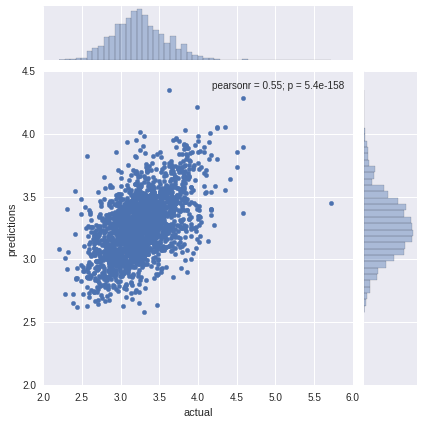

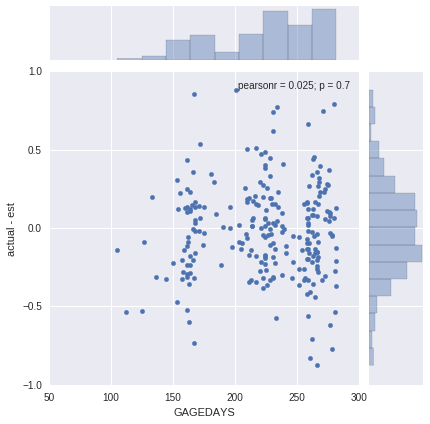

In [11]:
X, y = feature_selection1(raw_train_data)
train_and_evaluate_model(RandomForestRegressor(), X, y)


R^2 on the train set:
0.0172896853565

R^2 on the test set:
0.0923189058283
columns: ['SEXN' 'GAGEDAYS' 'HCIRCM' 'ABCIRCM' 'FEMURCM' 'BPDCM' 'ABCIRCM'
 'GAGEBRTH']


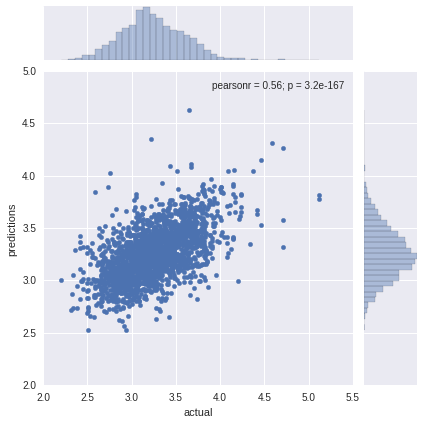

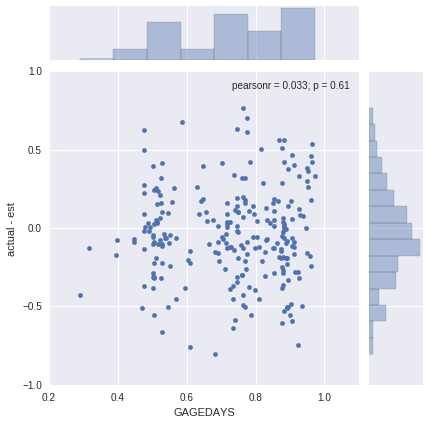

In [12]:
X, y = feature_selection2(raw_train_data)
train_and_evaluate_model(RandomForestRegressor(), X, y)

R^2 on the train set:
0.0169306218125

R^2 on the test set:
0.0976998586153
columns: ['SEXN' 'GAGEDAYS' 'HCIRCM' 'ABCIRCM' 'FEMURCM' 'BPDCM' 'HCAZ' 'ACAZ'
 'BPDAZ' 'FLAZ']


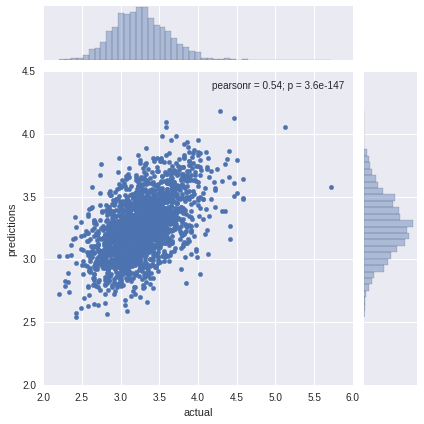

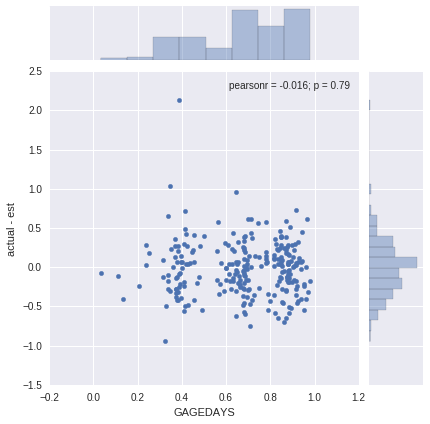

In [13]:
X, y = feature_selection3(raw_train_data)
train_and_evaluate_model(RandomForestRegressor(), X, y)

R^2 on the train set:
0.0169458225974

R^2 on the test set:
0.104582310525
columns: ['SEXN' 'PARITY' 'GRAVIDA' 'GAGEDAYS' 'HCIRCM' 'ABCIRCM' 'FEMURCM' 'BPDCM'
 'GAGEDAYS_DIFF_1' 'HCIRCM_RATE_1' 'ABCIRCM_RATE_1' 'FEMURCM_RATE_1'
 'BPDCM_RATE_1' 'GAGEDAYS_p2' 'GAGEDAYS_p3' 'HCIRCM_x_time'
 'ABCIRCM_x_time' 'FEMURCM_x_time' 'BPDCM_x_time' 'ABCIRCM_x_HCIRCM'
 'FEMURCM_x_HCIRCM' 'BPDCM_x_HCIRCM' 'ABCIRCM_x_HCIRCM_x_time'
 'FEMURCM_x_HCIRCM_x_time' 'BPDCM_x_HCIRCM_x_time' 'HCIRCM_x_ABCIRCM'
 'FEMURCM_x_ABCIRCM' 'BPDCM_x_ABCIRCM' 'HCIRCM_x_ABCIRCM_x_time'
 'FEMURCM_x_ABCIRCM_x_time' 'BPDCM_x_ABCIRCM_x_time' 'HCIRCM_x_FEMURCM'
 'ABCIRCM_x_FEMURCM' 'BPDCM_x_FEMURCM' 'HCIRCM_x_FEMURCM_x_time'
 'ABCIRCM_x_FEMURCM_x_time' 'BPDCM_x_FEMURCM_x_time' 'HCIRCM_x_BPDCM'
 'ABCIRCM_x_BPDCM' 'FEMURCM_x_BPDCM' 'HCIRCM_x_BPDCM_x_time'
 'ABCIRCM_x_BPDCM_x_time' 'FEMURCM_x_BPDCM_x_time']


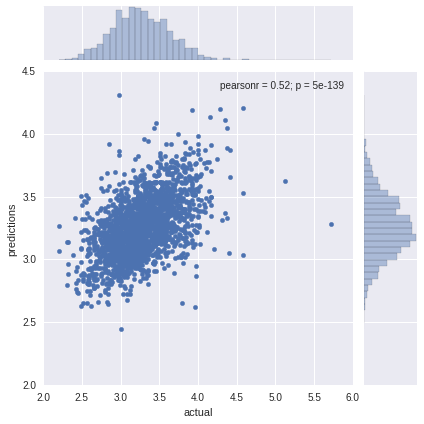

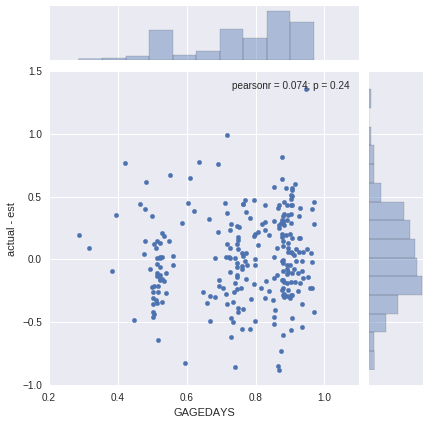

In [22]:
X, y = feature_selection4(raw_train_data)
train_and_evaluate_model(RandomForestRegressor(), X, y)

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor

input_dim = 0

def build_fn_reg(hidden_dims=50):
  print "hidden_dims:", hidden_dims
  model = Sequential()
  model.add(Dense(input_dim, input_shape=(input_dim,), init='normal', activation='relu'))
  model.add(Dense(hidden_dims, init='normal', activation='relu'))
  model.add(Dense(hidden_dims, init='normal', activation='relu'))
  model.add(Dense(1, init='normal', activation='linear'))
  model.compile(optimizer='adam', loss='mean_absolute_error',
    metrics=['accuracy'])
  return model

Using TensorFlow backend.


hidden_dims: 150
R^2 on the train set:
0.143385476163

R^2 on the test set:
0.129727526322
columns: ['SEXN' 'GAGEDAYS' 'HCIRCM' 'ABCIRCM' 'FEMURCM' 'BPDCM' 'ABCIRCM'
 'GAGEBRTH']


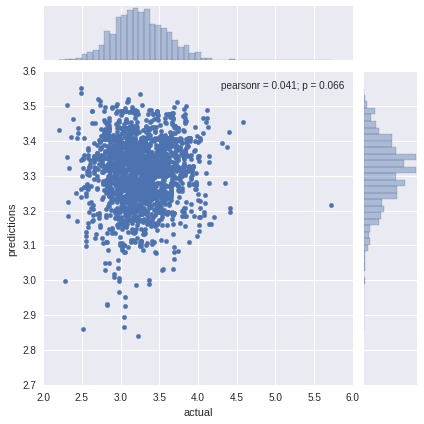

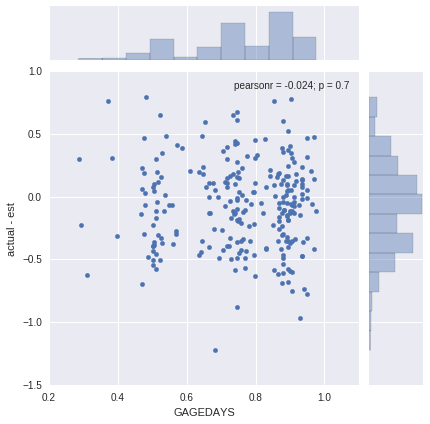

In [16]:
X, y = feature_selection2(raw_train_data)
input_dim = len(X.columns.values)
train_and_evaluate_model(KerasRegressor(
  build_fn=build_fn_reg, hidden_dims=150,
  batch_size=100, nb_epoch=10, verbose = 0), X, y)

hidden_dims: 150
R^2 on the train set:
0.090401317584

R^2 on the test set:
0.0858305566094
columns: ['SEXN' 'GAGEDAYS' 'HCIRCM' 'ABCIRCM' 'FEMURCM' 'BPDCM' 'HCAZ' 'ACAZ'
 'BPDAZ' 'FLAZ']


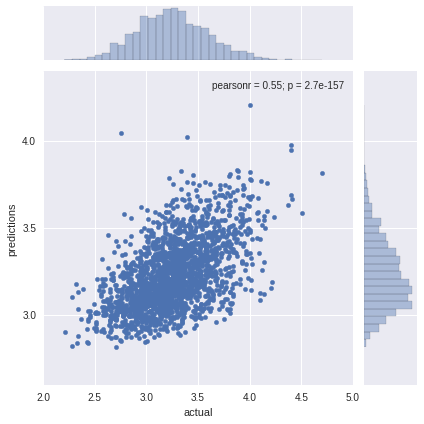

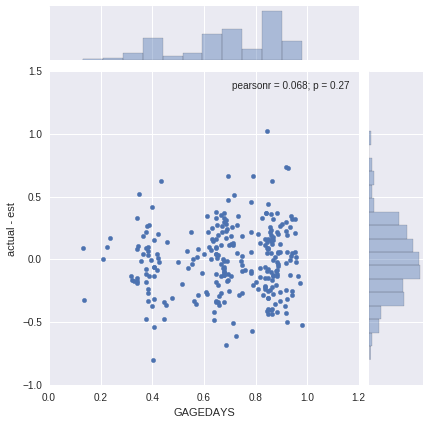

In [17]:
X, y = feature_selection3(raw_train_data)
input_dim = len(X.columns.values)
train_and_evaluate_model(KerasRegressor(
  build_fn=build_fn_reg, hidden_dims=150,
  batch_size=100, nb_epoch=10, verbose = 0), X, y)

hidden_dims: 350
R^2 on the train set:
0.0889761479171

R^2 on the test set:
0.0878187610937
columns: ['SEXN' 'PARITY' 'GRAVIDA' 'GAGEDAYS' 'HCIRCM' 'ABCIRCM' 'FEMURCM' 'BPDCM'
 'GAGEDAYS_DIFF_1' 'HCIRCM_RATE_1' 'ABCIRCM_RATE_1' 'FEMURCM_RATE_1'
 'BPDCM_RATE_1' 'GAGEDAYS_p2' 'GAGEDAYS_p3' 'HCIRCM_x_time'
 'ABCIRCM_x_time' 'FEMURCM_x_time' 'BPDCM_x_time' 'ABCIRCM_x_HCIRCM'
 'FEMURCM_x_HCIRCM' 'BPDCM_x_HCIRCM' 'ABCIRCM_x_HCIRCM_x_time'
 'FEMURCM_x_HCIRCM_x_time' 'BPDCM_x_HCIRCM_x_time' 'HCIRCM_x_ABCIRCM'
 'FEMURCM_x_ABCIRCM' 'BPDCM_x_ABCIRCM' 'HCIRCM_x_ABCIRCM_x_time'
 'FEMURCM_x_ABCIRCM_x_time' 'BPDCM_x_ABCIRCM_x_time' 'HCIRCM_x_FEMURCM'
 'ABCIRCM_x_FEMURCM' 'BPDCM_x_FEMURCM' 'HCIRCM_x_FEMURCM_x_time'
 'ABCIRCM_x_FEMURCM_x_time' 'BPDCM_x_FEMURCM_x_time' 'HCIRCM_x_BPDCM'
 'ABCIRCM_x_BPDCM' 'FEMURCM_x_BPDCM' 'HCIRCM_x_BPDCM_x_time'
 'ABCIRCM_x_BPDCM_x_time' 'FEMURCM_x_BPDCM_x_time']


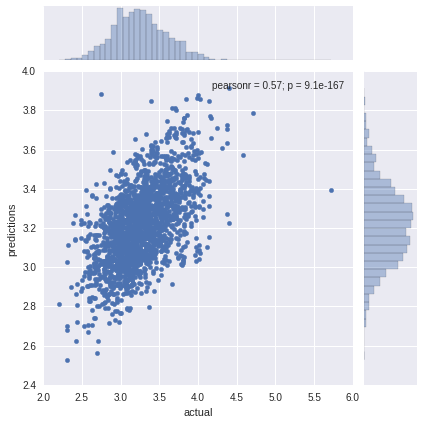

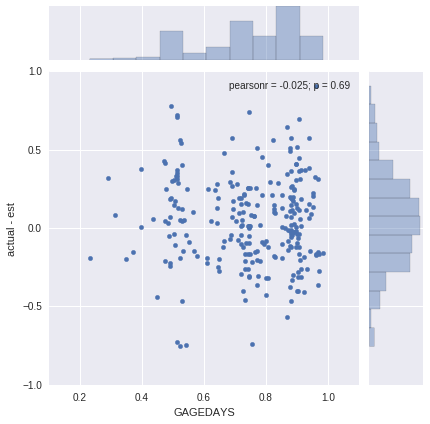

In [23]:
X, y = feature_selection4(raw_train_data)
input_dim = len(X.columns.values)
train_and_evaluate_model(KerasRegressor(
  build_fn=build_fn_reg, hidden_dims=350,
  batch_size=100, nb_epoch=50, verbose = 0), X, y)